In [1]:
import pymongo

In [2]:
from pymongo import MongoClient

In [3]:
connection = MongoClient('localhost', 27017)

In [4]:
db = connection.smart_hospital

In [5]:
data = db.heart

In [6]:
dblist = data.find()

In [7]:
dblist

In [8]:
import pandas as pd
df = pd.DataFrame(list(data.find()))

In [9]:
df.shape

(303, 15)

In [10]:
df.drop(['_id'],axis =1,inplace = True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


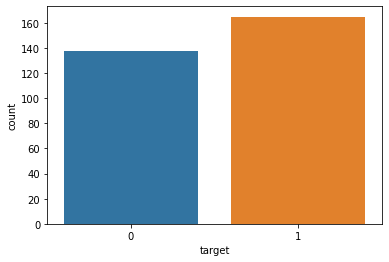

In [16]:
sns.countplot(df.target)
plt.show()

<AxesSubplot:>

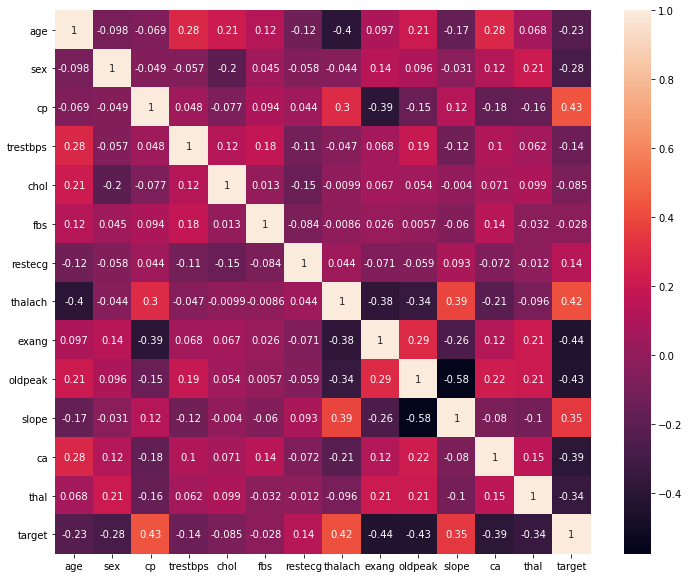

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
corr_matrix = abs(df.corr())
print(corr_matrix["target"].sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
X = df.drop('target',axis=1)
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)

In [23]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Data Shape: (242, 13)
Validation Data Shape: (61, 13)
Training Label Shape: (242,)
Validation Label Shape: (61,)


In [24]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

### Model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
print("Training Accuracy :", rfr.score(X_train, y_train))
print("Testing Accuracy :", rfr.score(X_valid, y_valid))

Training Accuracy : 1.0
Testing Accuracy : 0.7704918032786885


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
params={
    "n_estimators":[100,150,200,300,350,450,500],
"max_depth" : [50,60,70,80,90,100,150,200,240,260,280]}


random_search = RandomizedSearchCV (estimator = rfr,param_distributions=params,n_iter
=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

print('Score: {:.4}, with best C: {}'.format(random_search.best_score_,random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Score: 0.8315, with best C: {'n_estimators': 200, 'max_depth': 90}


In [30]:
print("Training Accuracy :", random_search.score(X_train, y_train))
print("Testing Accuracy :", random_search.score(X_valid, y_valid))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [31]:
a =[68,1,0,144,193,1,1,141,0,3.4,1,2,3]
# transform validation set
scaled = scaler.transform([a])
pred =  rfr.predict(scaled)

In [32]:
pred

array([0], dtype=int64)

In [33]:
y_predicted = random_search.predict(X_valid)

In [34]:
accuracy_score(y_valid, y_predicted)

1.0

In [35]:
import pickle
filename = 'heart_rfr.pkl'
pickle.dump(random_search, open(filename, 'wb'))

In [36]:
model = open("heart_rfr.pkl","rb")
model = pickle.load(model)

In [37]:
a =[68,1,0,144,193,1,1,141,0,3.4,1,2,3]
# transform validation set
scaled = scaler.transform([a])
pred =  model.predict(scaled)
pred

array([0], dtype=int64)